In [4]:
print("hello world")

hello world


In [5]:
import pandas as pd
df = pd.read_csv('red30.csv')

In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.head()

,OrderNum,OrderType,CustomerType,CustName,CustState,ProdCategory,ProdNumber,ProdName,Quantity,Price,Discount,OrderTotal
0,1100934,Wholesale,Business,Gusikowski Group,North Carolina,Blueprints,BP102,Bsquare Robot Blueprint,10,$8.99,$1.80,$88.10
1,1100935,Retail,Individual,Spencer Educators,Delaware,Drone Kits,DK204,BYOD-300,2,$89.00,0,$178.00
2,1100936,Wholesale,Business,Schinner Inc.,Florida,Training Videos,TV801,Aerial Security,10,$36.99,$7.40,$362.50
3,1100937,Retail,Individual,Saxon Laviss,Virginia,Robot Kits,RK602,BYOR-1000,1,$189.00,0,$189.00
4,1100938,Retail,Business,Wilderman Technologies,Texas,eBooks,EB502,Building Your First Robot,4,$24.95,0,$99.80


In [8]:
df.tail()

,OrderNum,OrderType,CustomerType,CustName,CustState,ProdCategory,ProdNumber,ProdName,Quantity,Price,Discount,OrderTotal
4971,1105905,Wholesale,Business,Rau-Dickinson,Kentucky,eBooks,EB503,Building Your Own Drone,5,$24.99,$5.00,$119.95
4972,1105906,Wholesale,Business,Reichel and Sons,Oklahoma,eBooks,EB502,Building Your First Robot,5,$24.95,$4.99,$119.76
4973,1105907,Wholesale,Business,Wolff LLC,South Carolina,Blueprints,BP104,Cat Robot Blueprint,10,$4.99,$1.00,$48.90
4974,1105908,Retail,Business,McClure Inc.,Utah,Drone Kits,DK209,BYOD-550,64,$179.00,0,"$11,456.00"
4975,1105909,Retail,Individual,Gussi Strodder,New York,Drone Kits,DK204,BYOD-300,1,$89.00,0,$89.00


In [9]:
df.describe()


,OrderNum,Quantity
count,4.976000e+03,4976.000000
mean,1.103422e+06,11.107516
std,1.436592e+03,20.367634
min,1.100934e+06,1.000000
25%,1.102178e+06,1.000000
50%,1.103422e+06,5.000000
75%,1.104665e+06,10.000000
max,1.105909e+06,109.000000


In [10]:
df["OrderTotal"].describe()

count        4976
unique       1215
top       $12.00 
freq           90
Name: OrderTotal, dtype: object

In [11]:
df["OrderType"].value_counts()

OrderType
Wholesale    2833
Retail       2143
Name: count, dtype: int64

In [12]:
df["OrderTotal"].value_counts()

OrderTotal
$12.00         90
$8.99          90
$49.00         87
$4.99          86
$23.99         84
               ..
$40,612.20      1
$1,385.01       1
$672.00         1
$1,794.28       1
$11,456.00      1
Name: count, Length: 1215, dtype: int64

In [13]:
df["ProdCategory"].value_counts()

ProdCategory
eBooks             1296
Training Videos     992
Blueprints          912
Drone Kits          552
Robot Kits          480
Drones              408
Robots              336
Name: count, dtype: int64

In [14]:
import matplotlib

<Axes: >

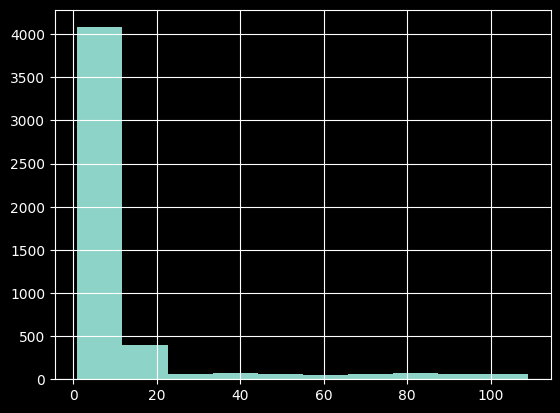

In [15]:
df['Quantity'].hist()

<Axes: ylabel='ProdCategory'>

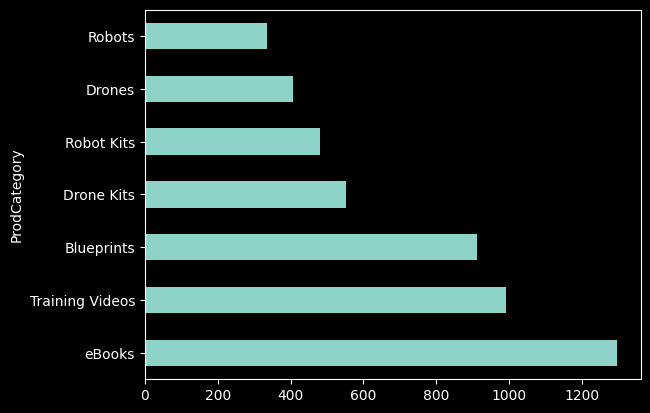

In [16]:
df["ProdCategory"].value_counts().plot(kind="barh")